In [2]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
import pandas as pd

# Exploratory Data Analysis


## **Lipinski descriptors**

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton (1 Da = 1 g/mol)
* Octanol-water partition coefficient (LogP) < 5 
    * Relates to hydrophilicity
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 


## 1. Frequency plot of bioactivity classes

In [3]:
df = pd.read_csv("HIV1-inhibitor_bioactivity_data.csv")

Text(0, 0.5, 'Frequency')

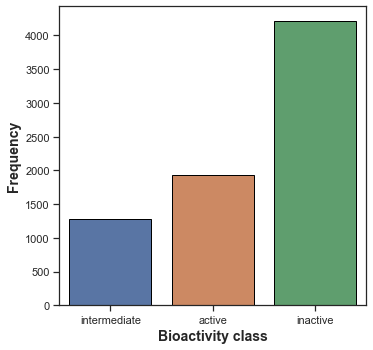

In [4]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')


In [5]:
df2 = df[df['bioactivity_class'] != "intermediate"]

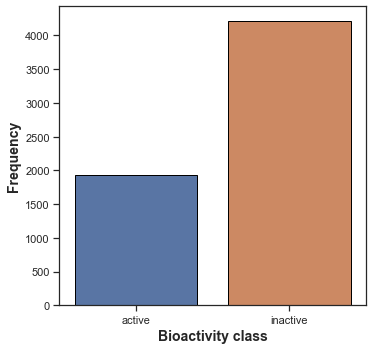

In [6]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df2, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

## 2. Scatter plot of MW versus LogP

It can be seen that the 2 bioactivity classes (active and inactive) are spanning similar chemical spaces in a similar range of molecular weight (0-2000 Da). However, the active compounds with large MW seem to span a wide varied range of chemical environments as evident by the scatter plot of MW vs LogP.

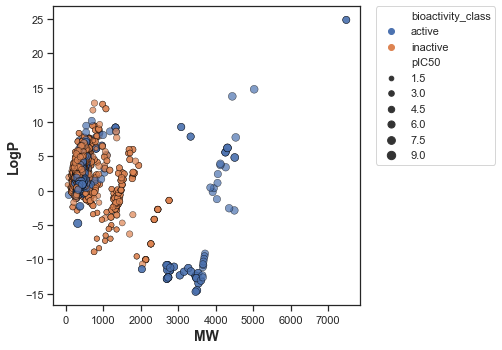

In [6]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df2, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

## 3. Boxplots comparing active and inactive classes

In [21]:
def mannwhitney(dataframe, descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = dataframe[selection]
  active = df[df['bioactivity_class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = dataframe[selection]
  inactive = df[df['bioactivity_class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

### A) pIC50
Expected to have different distributions as we defined inactive molecules as pIC50 < 5 and active as pIC50 > 6

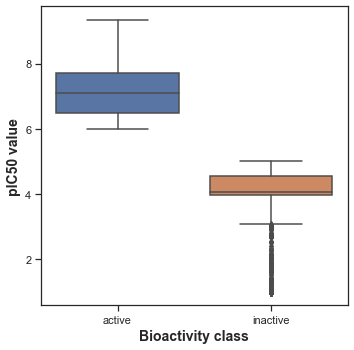

In [22]:
#pIC50
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df2)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [23]:
mannwhitney(df2, "pIC50")

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,0.0,0.05,Different distribution (reject H0)


### B) Molecular Weight

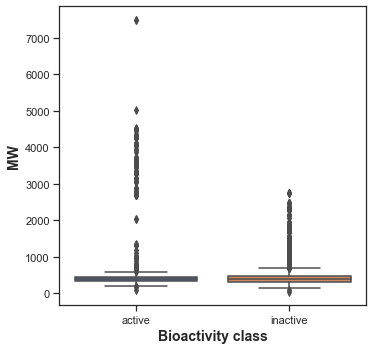

In [24]:
#MW
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df2)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

<AxesSubplot:xlabel='MW', ylabel='Count'>

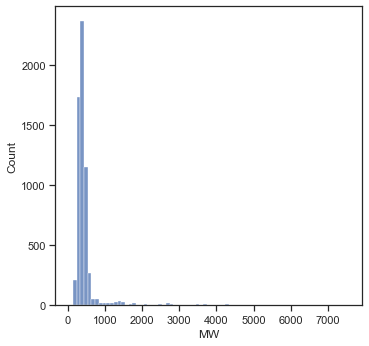

In [25]:
plt.figure(figsize=(5.5, 5.5))
sns.histplot(df2['MW'], binwidth = 100)

<AxesSubplot:xlabel='MW', ylabel='Count'>

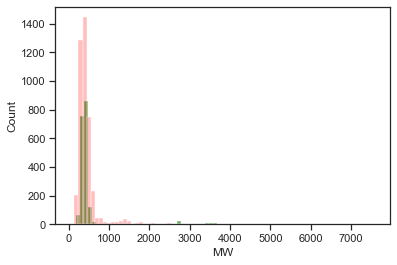

In [26]:
df_active = df2[df2["bioactivity_class"] == 'active']
df_inactive = df2[df2["bioactivity_class"] == 'inactive']

sns.histplot(df_active['MW'], color = 'green', binwidth = 100, alpha = 0.6)
sns.histplot(df_inactive['MW'], color = 'red', binwidth = 100, alpha = 0.25)

In [27]:
mannwhitney(df2, "MW")

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,3700698.0,9.281104e-10,0.05,Different distribution (reject H0)


### C) Octanol-water partition coefficient (LogP)

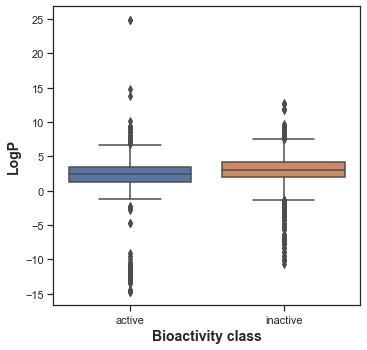

In [18]:
#logP
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df2)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [19]:
mannwhitney(df2, "LogP")

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,3107805.0,3.288055e-52,0.05,Different distribution (reject H0)


### D) Number of Hydrogen bond donors

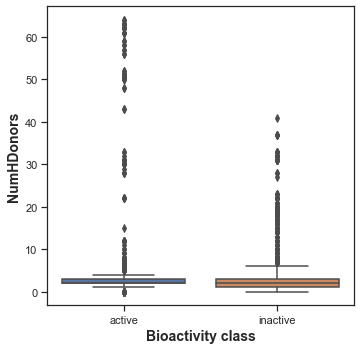

In [9]:
#NumHDonors
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df2)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [30]:
mannwhitney(df2, "NumHDonors")

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,3660444.0,3.783161e-12,0.05,Different distribution (reject H0)


### E) Number of hydrogen bond acceptors

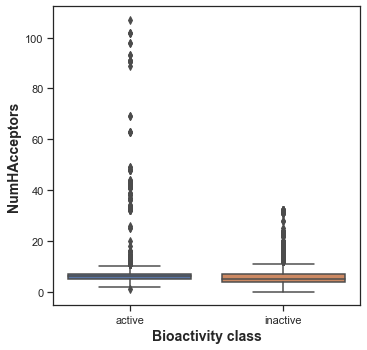

In [31]:
#NumHAcceptors
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df2)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [32]:
mannwhitney(df2, "NumHAcceptors")

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,3571990.0,3.138346e-16,0.05,Different distribution (reject H0)
